In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
start = '2015-01-01'
end = '2017-01-01'
united = get_pricing('UAL', start_date=start, end_date=end)
american = get_pricing('AAL', start_date=start, end_date=end)

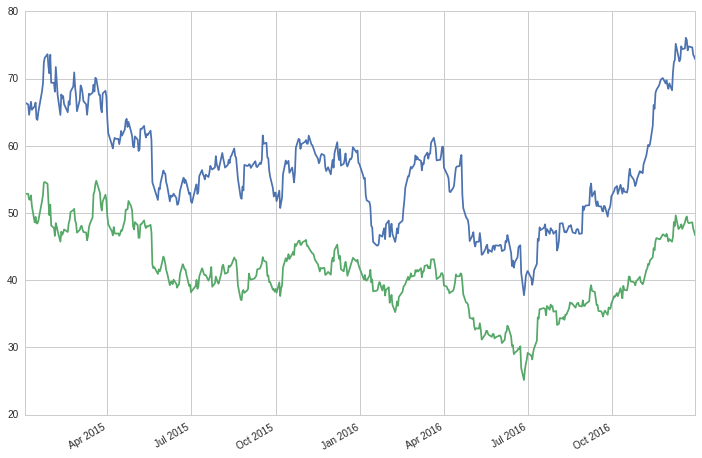

In [5]:
united['close_price'].plot(label='AA', figsize=(12,8))
american['close_price'].plot(label='UAL')

In [6]:
np.corrcoef(american['close_price'], united['close_price'])

array([[ 1.        ,  0.92333958],
       [ 0.92333958,  1.        ]])

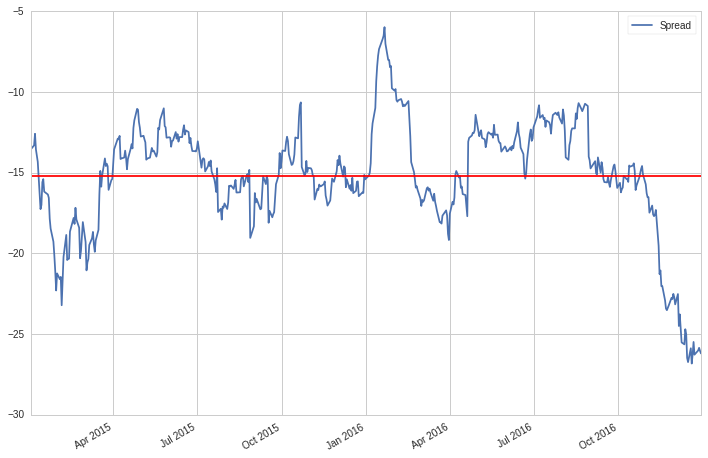

In [7]:
spread = american['close_price']- united['close_price']
spread.plot(label='Spread', figsize=(12,8))
plt.legend()
plt.axhline(spread.mean(), c='r');

In [10]:
def zscore(stocks):
    return (stocks- stocks.mean()) / np.std(stocks)

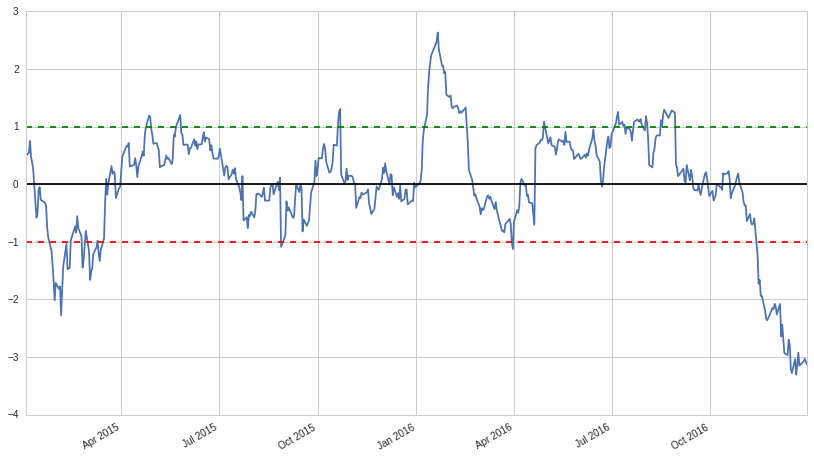

In [12]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, c='g', ls='--')
plt.axhline(-1.0, c='r', ls='--')

In [13]:
spread_mavg1 = spread.rolling(1).mean()
spread_mavg30 = spread.rolling(30).mean()
std_30 = spread.rolling(30).std()
zscore_30_1 = (spread_mavg1-spread_mavg30)/std_30


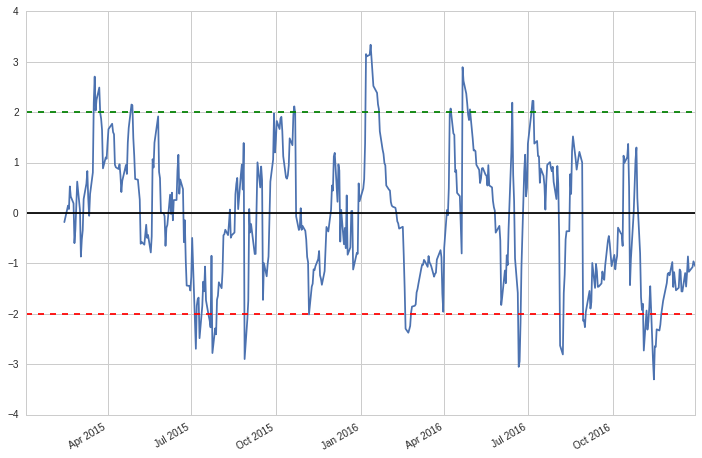

In [16]:
zscore_30_1.plot(figsize=(12,8), label='Rolling 30 day Zscpre')
plt.axhline(0, color = 'black')
plt.axhline(2, color='g', ls='--')
plt.axhline(-2, color='r', ls='--')